<a href="https://colab.research.google.com/github/RGoutham1124/AIML-LAB/blob/main/Dap_exam_2203A51124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
p_detection = 0.95
lambda_poisson = 100
num_sensors = 40
num_simulation_days = 5000

print(f"Simulation parameters defined:\nProbability of correct detection (p): {p_detection}\nAverage speeding vehicles per day per sensor (Poisson lambda): {lambda_poisson}\nNumber of sensors per city block: {num_sensors}\nTotal number of simulation days: {num_simulation_days}")

Simulation parameters defined:
Probability of correct detection (p): 0.95
Average speeding vehicles per day per sensor (Poisson lambda): 100
Number of sensors per city block: 40
Total number of simulation days: 5000


In [2]:
import numpy as np

daily_total_speeding_vehicles = []
daily_total_detections = []

for _ in range(num_simulation_days):
    # a. Generate the number of speeding vehicles for each sensor using Poisson distribution
    speeding_vehicles_per_sensor = np.random.poisson(lambda_poisson, num_sensors)
    total_speeding_vehicles_day = np.sum(speeding_vehicles_per_sensor)

    # b. Calculate the number of correctly detected vehicles for each sensor using Binomial distribution
    detected_vehicles_per_sensor = [np.random.binomial(n, p_detection) for n in speeding_vehicles_per_sensor]

    # c. Sum the detected vehicles from all sensors to get the total daily detections
    total_detections_day = np.sum(detected_vehicles_per_sensor)

    # d. Append the total actual speeding vehicles for the day to its respective list
    daily_total_speeding_vehicles.append(total_speeding_vehicles_day)

    # e. Append the total daily detections to its respective list
    daily_total_detections.append(total_detections_day)

print(f"Simulation complete for {num_simulation_days} days.")
print(f"First 5 days total speeding vehicles: {daily_total_speeding_vehicles[:5]}")
print(f"First 5 days total detections: {daily_total_detections[:5]}")

Simulation complete for 5000 days.
First 5 days total speeding vehicles: [np.int64(3980), np.int64(4044), np.int64(4010), np.int64(3922), np.int64(3986)]
First 5 days total detections: [np.int64(3790), np.int64(3852), np.int64(3810), np.int64(3739), np.int64(3776)]


In [3]:
import numpy as np

# 1. Convert the daily_total_detections and daily_total_speeding_vehicles lists to NumPy arrays
daily_total_detections_array = np.array(daily_total_detections)
daily_total_speeding_vehicles_array = np.array(daily_total_speeding_vehicles)

# 2. Calculate the probability that total daily detections are less than 750
prob_detections_less_than_750 = np.sum(daily_total_detections_array < 750) / num_simulation_days

# 3. Calculate the expected detection rate
total_detected = np.sum(daily_total_detections_array)
total_speeding = np.sum(daily_total_speeding_vehicles_array)
expected_detection_rate = total_detected / total_speeding

# 4. Calculate the total number of undetected violations
total_undetected_violations = total_speeding - total_detected

# 5. Calculate the ratio of detected to undetected violations
# Handle division by zero if no undetected violations (though unlikely in simulation)
ratio_detected_to_undetected = total_detected / total_undetected_violations if total_undetected_violations > 0 else np.inf

print(f"Probability of total daily detections < 750: {prob_detections_less_than_750:.4f}")
print(f"Expected detection rate: {expected_detection_rate:.4f}")
print(f"Total undetected violations over {num_simulation_days} days: {total_undetected_violations}")
print(f"Ratio of detected to undetected violations: {ratio_detected_to_undetected:.4f}")

Probability of total daily detections < 750: 0.0000
Expected detection rate: 0.9500
Total undetected violations over 5000 days: 1001091
Ratio of detected to undetected violations: 18.9855


In [4]:
import numpy as np

# 1. Calculate the daily detection proportion for each day
daily_detection_proportions = daily_total_detections_array / daily_total_speeding_vehicles_array

# 2. Determine the number of bootstrap samples
num_bootstrap_samples = 10000

# 3. Create an empty list to store the mean detection proportions from each bootstrap sample
bootstrap_detection_proportions = []

# 4. Perform a bootstrap resampling loop
for _ in range(num_bootstrap_samples):
    # a. Randomly sample, with replacement, from daily_detection_proportions
    bootstrap_sample = np.random.choice(daily_detection_proportions, size=len(daily_detection_proportions), replace=True)
    # b. Calculate the mean of this bootstrap sample
    mean_bootstrap_proportion = np.mean(bootstrap_sample)
    # c. Append this mean to the bootstrap_detection_proportions list
    bootstrap_detection_proportions.append(mean_bootstrap_proportion)

# Convert to numpy array for easier calculations
bootstrap_detection_proportions_array = np.array(bootstrap_detection_proportions)

# 5. Calculate the 95% percentile confidence interval
lower_bound_95 = np.percentile(bootstrap_detection_proportions_array, 2.5)
upper_bound_95 = np.percentile(bootstrap_detection_proportions_array, 97.5)

# 6. Calculate the 99% percentile confidence interval
lower_bound_99 = np.percentile(bootstrap_detection_proportions_array, 0.5)
upper_bound_99 = np.percentile(bootstrap_detection_proportions_array, 99.5)

# 7. Print the calculated confidence intervals
print(f"95% Confidence Interval for Detection Proportion: [{lower_bound_95:.4f}, {upper_bound_95:.4f}]")
print(f"99% Confidence Interval for Detection Proportion: [{lower_bound_99:.4f}, {upper_bound_99:.4f}]")

95% Confidence Interval for Detection Proportion: [0.9499, 0.9501]
99% Confidence Interval for Detection Proportion: [0.9498, 0.9501]


In [5]:
print("System Requirement: At least 80% of speeding vehicles must be detected.\n")

# 1. Compare the expected_detection_rate with the 80% threshold
print(f"Expected Detection Rate: {expected_detection_rate:.4f}")
if expected_detection_rate >= 0.80:
    print("Conclusion (Expected Rate): The expected detection rate meets the 80% requirement.")
else:
    print("Conclusion (Expected Rate): The expected detection rate DOES NOT meet the 80% requirement.")

print(f"\n95% Confidence Interval for Detection Proportion: [{lower_bound_95:.4f}, {upper_bound_95:.4f}]")
print(f"99% Confidence Interval for Detection Proportion: [{lower_bound_99:.4f}, {upper_bound_99:.4f}]")

# 2. Check if the lower bounds of both the 95% and 99% confidence intervals are >= 0.80
meets_95_ci = lower_bound_95 >= 0.80
meets_99_ci = lower_bound_99 >= 0.80

print("\nEvaluation based on Confidence Intervals:")
if meets_95_ci:
    print("The lower bound of the 95% Confidence Interval (0.80) meets the 80% requirement.")
else:
    print("The lower bound of the 95% Confidence Interval (0.80) DOES NOT meet the 80% requirement.")

if meets_99_ci:
    print("The lower bound of the 99% Confidence Interval (0.80) meets the 80% requirement.")
else:
    print("The lower bound of the 99% Confidence Interval (0.80) DOES NOT meet the 80% requirement.")

# 3. Overall Conclusion
print("\nOverall System Requirement Evaluation:")
if expected_detection_rate >= 0.80 and meets_95_ci and meets_99_ci:
    print("The system unequivocally meets the requirement of detecting at least 80% of speeding vehicles, as indicated by the high expected detection rate and both confidence intervals.")
elif expected_detection_rate >= 0.80 and (meets_95_ci or meets_99_ci):
    print("The system likely meets the requirement of detecting at least 80% of speeding vehicles, but there's a slight uncertainty based on one of the confidence intervals.")
else:
    print("The system DOES NOT meet the requirement of detecting at least 80% of speeding vehicles based on the expected rate and/or confidence intervals.")

System Requirement: At least 80% of speeding vehicles must be detected.

Expected Detection Rate: 0.9500
Conclusion (Expected Rate): The expected detection rate meets the 80% requirement.

95% Confidence Interval for Detection Proportion: [0.9499, 0.9501]
99% Confidence Interval for Detection Proportion: [0.9498, 0.9501]

Evaluation based on Confidence Intervals:
The lower bound of the 95% Confidence Interval (0.80) meets the 80% requirement.
The lower bound of the 99% Confidence Interval (0.80) meets the 80% requirement.

Overall System Requirement Evaluation:
The system unequivocally meets the requirement of detecting at least 80% of speeding vehicles, as indicated by the high expected detection rate and both confidence intervals.


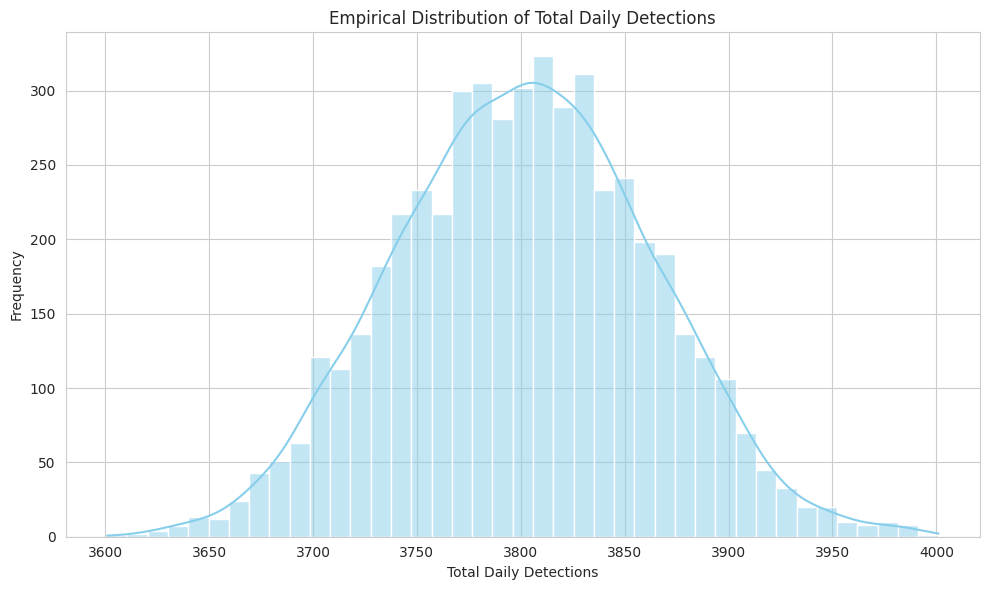

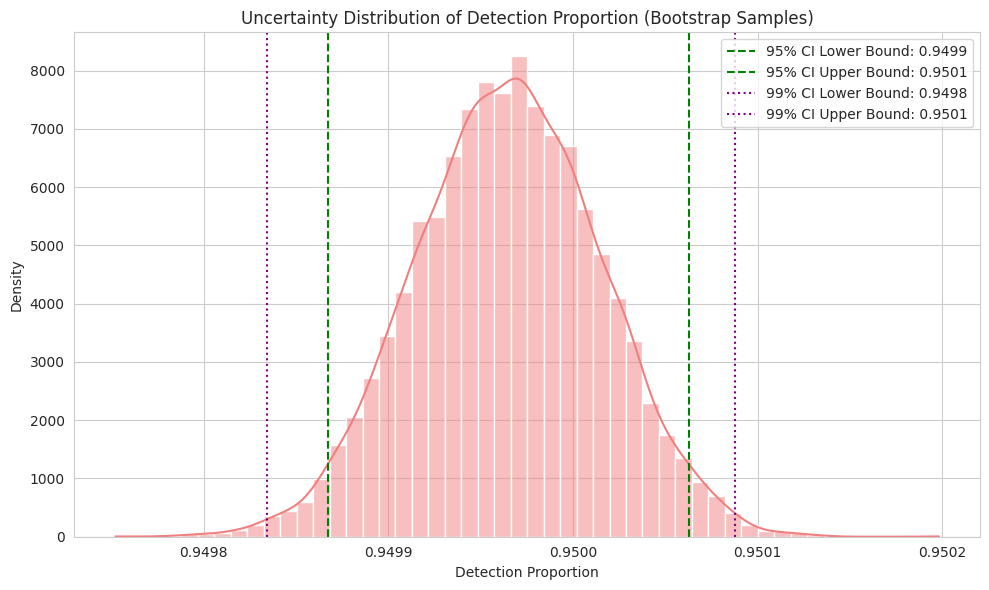

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better aesthetics
sns.set_style("whitegrid")

# 1. Plot empirical distribution of total daily detections
plt.figure(figsize=(10, 6))
sns.histplot(daily_total_detections_array, kde=True, color='skyblue', stat='count')
plt.title('Empirical Distribution of Total Daily Detections')
plt.xlabel('Total Daily Detections')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Plot uncertainty distribution of detection proportion (bootstrap samples)
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_detection_proportions_array, kde=True, color='lightcoral', stat='density', bins=50)
plt.title('Uncertainty Distribution of Detection Proportion (Bootstrap Samples)')
plt.xlabel('Detection Proportion')
plt.ylabel('Density')

# Highlight 95% Confidence Interval
plt.axvline(lower_bound_95, color='green', linestyle='--', label=f'95% CI Lower Bound: {lower_bound_95:.4f}')
plt.axvline(upper_bound_95, color='green', linestyle='--', label=f'95% CI Upper Bound: {upper_bound_95:.4f}')

# Highlight 99% Confidence Interval
plt.axvline(lower_bound_99, color='purple', linestyle=':', label=f'99% CI Lower Bound: {lower_bound_99:.4f}')
plt.axvline(upper_bound_99, color='purple', linestyle=':', label=f'99% CI Upper Bound: {upper_bound_99:.4f}')

plt.legend()
plt.tight_layout()
plt.show()